In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
heart=pd.read_csv('../input/heart.csv')
heart.info()

x=heart.drop("target",axis=1)
y=heart.target.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [3]:
from sklearn.model_selection import train_test_split
x=(x-np.min(x))/(np.max(x)-np.min(x)).values
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

x_test=x_test.T
x_train=x_train.T
y_test=y_test.T 
y_train=y_train.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (13, 242)
x_test:  (13, 61)
y_train:  (242,)
y_test:  (61,)


In [4]:
class LogReg():
    def initialize_weights_and_bias(self,dimension):
        w=np.full((dimension,1),0.01) #initial weight values
        b=0.0 #initial bias values
        return w,b
    
    def sigmoid(self,z):
        y_head=1/(1+np.exp(-z))
        return y_head

    def forward_backward_propagation(self,w,b,x_train,y_train):
        z=np.dot(w.T,x_train)+b #our model
        y_head=self.sigmoid(z)        
        loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
        cost=np.sum(loss)/x_train.shape[1] #cost function
        
        #backward propagation
        derivative_weights=np.dot(x_train,(y_head-y_train).T)/x_train.shape[1]
        derivative_bias= np.sum(y_head-y_train)/x_train.shape[1]
        
        gradients={"derivative_weight": derivative_weights, "derivative_bias": derivative_bias}
        return cost,gradients
    def update(self,w,b,x_train,y_train,learning_rate,number_of_iteration):
        self.cost_list=[]
        for i in range (number_of_iteration):
            cost,gradients=self.forward_backward_propagation(w,b,x_train,y_train)
            self.cost_list.append(cost)
            
            w=w-learning_rate*gradients["derivative_weight"]
            b=b-learning_rate*gradients["derivative_bias"]
        parameters={"weight":w, "bias":b}
        return parameters,gradients,self.cost_list
    def predict(self,w,b,x_test):
        z=self.sigmoid(np.dot(w.T,x_test)+b)
        Y_prediction=np.zeros((1,x_test.shape[1]))
        for i in range (z.shape[1]):
            if z[0,1]<=0.5:
                Y_prediction[0,i]=0
            else:
                Y_prediction[0,i]=1
        return Y_prediction
#    def score(self,x_test,y_test):
#        y_head=self.predict(x_test)
#        return 1-np.mean(np.abs(y_head-y_test))

test accuracy: 52.459016393442624 %
test accuracy 0.8524590163934426


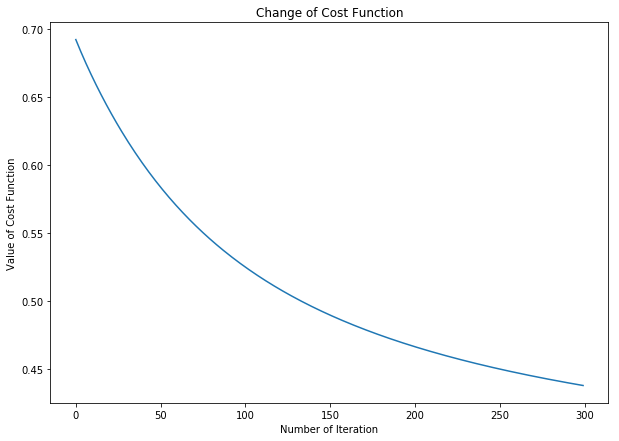

In [5]:
log_reg=LogReg()
dimension=x_train.shape[0]
w,b = log_reg.initialize_weights_and_bias(dimension)
parameters,gradients,cost_list= log_reg.update(w,b,x_train,y_train,0.1,300)
y_prediction_test=log_reg.predict(parameters["weight"],parameters["bias"],x_test)
print("test accuracy: {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
#print("test accuracy: {} %".format(log_reg.score(x_test,y_test)))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
# plt.figure(figsize=(10,7))
# plt.plot(np.arange(len(log_reg.cost_list)),np.array(log_reg.cost_list))
# plt.title("Change of Cost Function")
# plt.ylabel("Value of Cost Function")
# plt.xlabel("Number of Iteration")
# plt.show()